## This is the notebook detailing the energy savings for the Industrial Energy Capstone Project

The boxplot will detail energy savings for a given set of inputs

In [1]:
# Import Packages
import pandas as pd
from pathlib import Path
import numpy as npq
import seaborn as sns
import matplotlib.pyplot as plt
import janitor
from janitor import clean_names

In [2]:
# Load Data
# ------- define paths -------
relative_path = Path('../data/intermediate_data/') # define relative path
absolute_path = relative_path.resolve() # get absolute path


# ------- import data -------
#assess_df = pd.read_csv(absolute_path/'iac_assess_tidy.csv') # import IAC assess dataset
assess_recc_ppi_df = pd.read_csv(absolute_path/'assess_recc_ppi_emissions.csv') # import IAC recc dataset
#ppi_df = pd.read_csv(absolute_path/'ppi_tidy.csv') # import ppi dataset

C:\Users\Brent Newby\AppData\Local\Temp\ipykernel_19828\2913574641.py:9: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  assess_recc_ppi_df = pd.read_csv(absolute_path/'assess_recc_ppi_emissions.csv') # import IAC recc dataset


In [4]:
# Check first 5 rows
assess_recc_ppi_df.head()

,Unnamed: 0,superid,id,ar_number,appcode,arc2,impstatus,impcost,ref_year_impcost,source_rank,...,products,produnits,prodlevel,prodhours,numars,plant_cost,plant_usage,emissions,u,emission_value
0,0,AM007601,am0076,1,NaN,2.3212,I,64000.0,64000.0,PSOURCCODE,...,PIPECOATING,6.0,9038.0,2400.0,5.0,269266.0,3456917.0,2.615849e+06,kg,0.0
1,1,AM007601,am0076,1,NaN,2.3212,I,64000.0,64000.0,PSOURCCODE,...,PIPECOATING,6.0,9038.0,2400.0,5.0,269266.0,3456917.0,6.985103e+03,kg,0.0
2,2,AM007601,am0076,1,NaN,2.3212,I,64000.0,64000.0,PSOURCCODE,...,PIPECOATING,6.0,9038.0,2400.0,5.0,269266.0,3456917.0,8.137185e+03,kg,0.0
3,3,AM007601,am0076,1,NaN,2.3212,I,64000.0,64000.0,PSOURCCODE,...,PIPECOATING,6.0,9038.0,2400.0,5.0,29923.0,8238.0,6.233694e+03,kg,0.0
4,4,AM007601,am0076,1,NaN,2.3212,I,64000.0,64000.0,PSOURCCODE,...,PIPECOATING,6.0,9038.0,2400.0,5.0,29923.0,8238.0,1.664584e+01,kg,0.0


In [9]:

# get arcs2 for sector = 311 (food production)
assess_recc_ppi_311_df = assess_recc_ppi_df[assess_recc_ppi_df['naics'].astype(str).str.startswith('311')]

assess_recc_ppi_311_df[assess_recc_ppi_311_df['superid']=='AM043901']
assess_recc_ppi_311_df[assess_recc_ppi_311_df['id']=='AM0439']

assess_recc_ppi_311_df['arc2'].unique()[:15]


array([2.4236, 2.2511, 2.4231, 2.7142, 2.7124, 2.2523, 2.4239, 2.7421,
       2.7121, 2.4314, 2.7135, 2.7145, 2.7134, 3.4115, 2.4133])

In [10]:
# set filters
arc2_filter = [4.132 , 4.652 , 3.7214, 2.1113, 3.4111, 2.4236, 2.2113, 2.2511, 
               2.4231, 2.7142, 3.4154, 2.2135, 2.7124, 2.2136, 2.2523]
sector_filter = '311'
period_filter_from = 2010
period_filter_to = 2024

In [12]:
# <remove> when PPI values are updated for all ARCs
# drop rows where IMPCOST is NA
filtered_clean_df = assess_recc_ppi_311_df.dropna(subset=['ref_year_impcost'])

In [16]:
# calculate the outliers

# Compute Q1, Q3, and IQR
Q1 = assess_recc_ppi_df["ref_year_impcost"].quantile(0.25)
Q3 = assess_recc_ppi_311_df["ref_year_impcost"].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = filtered_clean_df[(filtered_clean_df["ref_year_impcost"] < lower_bound) | (filtered_clean_df["ref_year_impcost"] > upper_bound)]

# Display outliers
print(outliers[["impstatus", "ref_year_impcost"]])

        impstatus  ref_year_impcost
21054           I      68790.248963
21055           I      68790.248963
21056           I      68790.248963
21057           I      68790.248963
21058           I      68790.248963
...           ...               ...
1068109         N     106614.674868
1068110         N     106614.674868
1068111         N     106614.674868
1068112         N     106614.674868
1068113         N     106614.674868

[3700 rows x 2 columns]


In [17]:
# Define a path to save visualizations

# Define relative path
relative_path_vis = Path('../assets/')
absolute_path_vis = relative_path_vis.resolve() # get absolute path

In [21]:
# troubleshooting
print(filtered_clean_df['impstatus'].unique())


['I' 'N' nan 'K']


c:\ProgramData\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
c:\ProgramData\anaconda3\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
c:\ProgramData\anaconda3\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
c:\ProgramData\anaconda3\Lib\ast.py:587

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\MEDS\\capstone\\industrialenergy_datainterface\\assets\\energy_savings_boxplot.png'

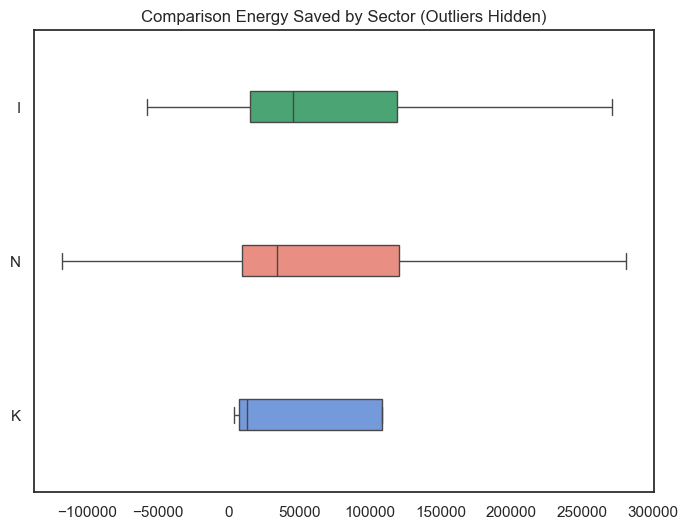

In [22]:
# Boxplot of conserved energy
# on the recc table - use 'conserved' - energy. saved - dollars.
sns.set_theme(style="white")

# Create the boxplot while ignoring outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_clean_df, x="conserved", y="impstatus", 
            width=0.2, 
            showfliers=False,
            palette={"N": "salmon", "I": "mediumseagreen", "K": "cornflowerblue"}, hue='impstatus',
            legend=False)

# Customize plot
plt.title("Comparison Energy Saved by Sector (Outliers Hidden)")
plt.xlabel("")
plt.ylabel("")

# Save the plot to an image file (e.g., PNG)
plt.savefig(absolute_path_vis/'energy_savings_boxplot.png', format='png') 

plt.show()